# K-means clustering in Python

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 01: importing the dataset


#### https://www.kaggle.com/chaandsheikh/instagram-visit-clustering

In [37]:
data = pd.read_csv('Instagram visits clustering.csv')

In [38]:
data.head(20)

,User ID,Instagram visit score,Spending_rank(0 to 100)
0,0,63,24.050708
1,1,61,25.223290
2,2,104,18.528245
3,3,82,86.890232
4,4,14,31.492397
5,5,74,81.195314
6,6,83,88.119729
7,7,71,87.468356
8,8,42,80.829564
9,9,79,25.966622


In [39]:
data = data.sample(frac = 1) 

## Step 02: Extraction of data

In [40]:
X = data.iloc[:, [1, 2]].values

In [41]:
X[:10]

array([[98.        , 31.79247738],
       [19.        , 14.62477033],
       [12.        , 39.63081546],
       [75.        , 95.49217662],
       [95.        , 24.44111818],
       [86.        , 22.05812746],
       [77.        , 20.87818154],
       [33.        , 63.20917762],
       [93.        , 18.4235839 ],
       [90.        , 19.03134888]])

# Step 03: Use elbow method for finding optimal number of clusters

In [42]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

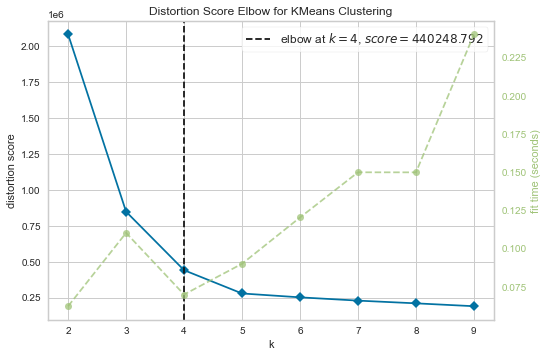

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Step 04: Apply K-means clustering

In [44]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

In [45]:
kmeans.labels_

array([1, 3, 3, ..., 1, 0, 1])

In [46]:
y = kmeans.predict(X)

In [47]:
y[:200]

array([1, 3, 3, 0, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 3, 0, 0, 0, 2, 1, 3, 1,
       1, 3, 1, 1, 0, 0, 1, 3, 0, 1, 1, 2, 0, 0, 0, 0, 2, 1, 2, 1, 0, 0,
       2, 0, 2, 0, 0, 3, 2, 1, 1, 3, 2, 2, 0, 0, 0, 3, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 3, 1, 2, 1, 1, 0, 1, 0, 1, 3, 3, 1, 0, 1, 1, 1, 1, 2, 1,
       1, 0, 2, 3, 2, 3, 3, 0, 3, 1, 2, 3, 3, 0, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 0, 2, 3, 3, 1, 2, 1, 3, 2, 3, 1, 1, 1, 0, 0, 2, 1, 1, 2, 1, 3,
       1, 1, 1, 0, 3, 1, 2, 2, 2, 2, 2, 1, 1, 1, 3, 1, 3, 1, 3, 0, 1, 0,
       1, 1, 1, 3, 2, 0, 1, 1, 0, 0, 2, 2, 1, 0, 1, 3, 0, 1, 3, 1, 3, 0,
       3, 0, 2, 1, 2, 1, 0, 3, 0, 1, 1, 2, 3, 1, 2, 3, 3, 3, 3, 0, 2, 1,
       2, 2])

## Step 05: Visualization

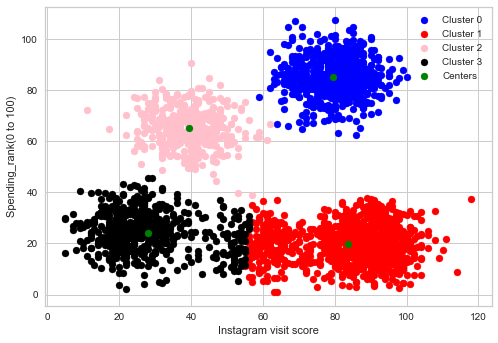

In [48]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Cluster 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Cluster 1')
plt.scatter(X[y == 2, 0], X[y == 2, 1], c='pink', label='Cluster 2')
plt.scatter(X[y == 3, 0], X[y == 3, 1], c='black', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c='green', label='Centers')
plt.xlabel('Instagram visit score')
plt.ylabel('Spending_rank(0 to 100)')
plt.legend()
plt.show()

# Extracting the cluster data

In [49]:
data.iloc[y == 3]

,User ID,Instagram visit score,Spending_rank(0 to 100)
97,97,19,14.624770
1041,1041,12,39.630815
2251,2251,26,35.418590
142,142,17,37.611825
190,190,22,21.671229
...,...,...,...
2546,2546,31,35.199614
1145,1145,28,27.335853
1655,1655,34,13.697512
1989,1989,27,18.318137


# Dendrogram

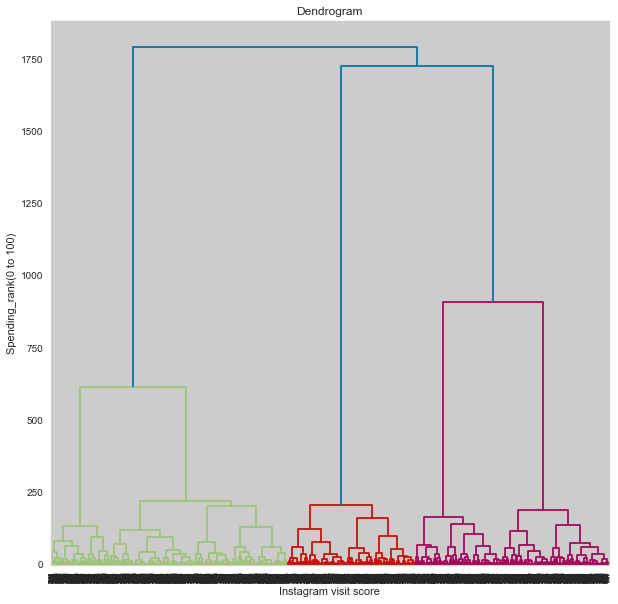

In [50]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Instagram visit score')
plt.ylabel('Spending_rank(0 to 100)')
plt.show()

In [51]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y = hc.fit_predict(X)

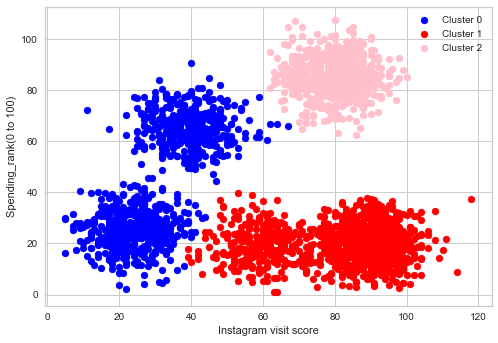

In [52]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Cluster 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Cluster 1')
plt.scatter(X[y == 2, 0], X[y == 2, 1], c='pink', label='Cluster 2')
plt.xlabel('Instagram visit score')
plt.ylabel('Spending_rank(0 to 100)')
plt.legend()
plt.show()